https://docs.google.com/spreadsheets/d/15em-6D42SIxnR91fpG7w9mHLQKtS5WiQC0dTTnpt4B4/edit#gid=339262567


In [1]:
import pandas as pd

df = pd.read_csv('CEA - lead paint regulation - Uncertainty analysis.csv')
df.head()

,Trial,Discounted health benefit ($),Discounted income benefit ($),Total discounted benefit ($),Discounted costs ($),Benefit-cost ratio,Unnamed: 6,Unnamed: 7
0,Non-trial,"$65,063,351","$423,463,253","$488,526,604","$3,977,718",122.8,NaN,NaN
1,1,"$1,994,123","$27,717,671","$29,711,794","$1,074,863",27.6,NaN,NaN
2,2,"$12,118,522","$106,100,754","$118,219,276","$2,886,192",41.0,NaN,NaN
3,3,"$3,634,909","$21,042,653","$24,677,562","$2,286,146",10.8,NaN,NaN
4,4,"$19,074,592","$172,967,258","$192,041,851","$2,348,051",81.8,NaN,"NOTE: To run model, click on cell B3, then cli..."


In [2]:
df.drop(columns=['Unnamed: 6', 'Unnamed: 7'], inplace=True)

In [3]:
df.head()

,Trial,Discounted health benefit ($),Discounted income benefit ($),Total discounted benefit ($),Discounted costs ($),Benefit-cost ratio
0,Non-trial,"$65,063,351","$423,463,253","$488,526,604","$3,977,718",122.8
1,1,"$1,994,123","$27,717,671","$29,711,794","$1,074,863",27.6
2,2,"$12,118,522","$106,100,754","$118,219,276","$2,886,192",41.0
3,3,"$3,634,909","$21,042,653","$24,677,562","$2,286,146",10.8
4,4,"$19,074,592","$172,967,258","$192,041,851","$2,348,051",81.8


In [6]:
df.drop(0, inplace=True)

In [7]:
benefits = df['Total discounted benefit ($)']

In [8]:
benefits

1        $29,711,794
2       $118,219,276
3        $24,677,562
4       $192,041,851
5       $271,243,183
            ...     
1000    $152,513,261
1001    $182,426,721
1002    $155,814,237
1003    $509,809,822
1004     $26,328,242
Name: Total discounted benefit ($), Length: 1004, dtype: object

In [11]:
benefits = benefits.replace('[\$,]', '', regex=True).astype(float)


<Axes: >

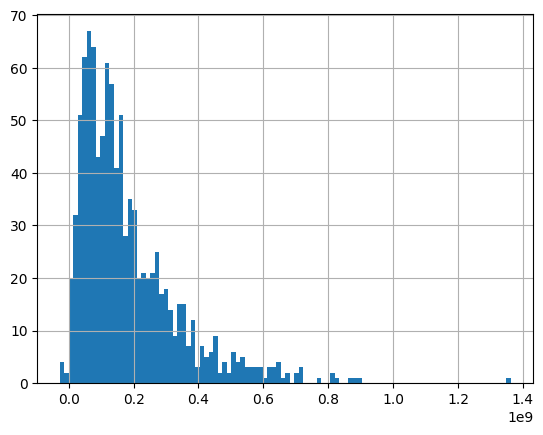

In [13]:
benefits.hist(bins=100)



In [14]:
# fit a lognormal distribution to benefits, displayed on top of the histogram
from scipy.stats import lognorm
from matplotlib import pyplot as plt

shape, loc, scale = lognorm.fit(benefits, floc=0)

x = np.linspace(0, 100000000, 1000)

pdf = lognorm.pdf(x, shape, loc, scale)

plt.plot(x, pdf, label='lognormal pdf')

plt.hist(benefits, bins=100, density=True, label='data')




FitDataError: Invalid values in `data`.  Maximum likelihood estimation with 'lognorm' requires that 0.0 < (x - loc)/scale  < inf for each x in `data`.

In [15]:
benefits[benefits < 0]

160   -27214795.0
695   -13679444.0
818   -14510036.0
837   -18082506.0
992   -11486977.0
Name: Total discounted benefit ($), dtype: float64

We can't fit a lognormal distribution to the results, because some results are negative. I'm going to cheat and remove these, but I don't think it's appropriate to do this in general.

(array([2.86642403e-10, 1.43321201e-10, 1.43321201e-09, 2.29313922e-09,
        3.65469064e-09, 4.44295724e-09, 4.80126025e-09, 4.58627845e-09,
        3.08140583e-09, 3.36804823e-09, 4.37129664e-09, 4.08465424e-09,
        2.93808463e-09, 3.65469064e-09, 2.00649682e-09, 2.50812102e-09,
        2.36479982e-09, 1.43321201e-09, 1.50487261e-09, 1.43321201e-09,
        1.50487261e-09, 1.79151502e-09, 1.21823021e-09, 1.28989081e-09,
        1.00324841e-09, 6.44945406e-10, 1.07490901e-09, 1.07490901e-09,
        5.01624205e-10, 8.59927209e-10, 2.14981802e-10, 5.01624205e-10,
        3.58303004e-10, 4.29963604e-10, 6.44945406e-10, 1.43321201e-10,
        2.86642403e-10, 1.43321201e-10, 4.29963604e-10, 2.86642403e-10,
        3.58303004e-10, 2.14981802e-10, 2.14981802e-10, 2.14981802e-10,
        2.14981802e-10, 7.16606007e-11, 2.14981802e-10, 2.14981802e-10,
        2.86642403e-10, 7.16606007e-11, 1.43321201e-10, 0.00000000e+00,
        1.43321201e-10, 2.14981802e-10, 0.00000000e+00, 0.000000

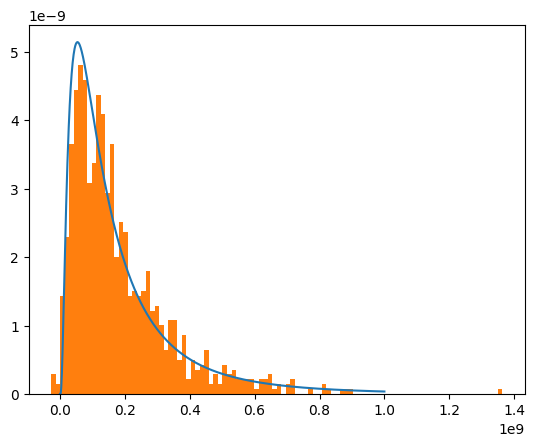

In [18]:
from scipy.stats import lognorm
from matplotlib import pyplot as plt
import numpy as np

shape, loc, scale = lognorm.fit(benefits[benefits > 0], floc=0)

x = np.linspace(0, 1000000000, 1000)

pdf = lognorm.pdf(x, shape, loc, scale)

plt.plot(x, pdf, label='lognormal pdf')

plt.hist(benefits, bins=100, density=True, label='data')


